In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
np.random.seed(0)
hours_studied = np.random.uniform(0, 10, 100)  # Random hours studied (0 to 10 hours)
exam_scores = 50 + 5 * hours_studied + np.random.normal(0, 2, 100)  # Linear relationship with noise

In [5]:
data = pd.DataFrame({'Hours_Studied': hours_studied, 'Exam_Scores': exam_scores})


In [6]:
data

,Hours_Studied,Exam_Scores
0,5.488135,75.110376
1,7.151894,87.561121
2,6.027634,81.069494
3,5.448832,74.171672
4,4.236548,74.159244
...,...,...
95,1.831914,60.522757
96,5.865129,77.718827
97,0.201075,49.626278
98,8.289400,90.535936


In [7]:
X = data[['Hours_Studied']]
y = data['Exam_Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_test)
print(X_train)


    Hours_Studied
83       6.924721
53       1.020448
70       9.764595
45       6.706379
44       6.667667
39       6.818203
22       4.614794
80       3.179832
10       7.917250
0        5.488135
18       7.781568
30       2.645556
73       6.048455
33       5.684339
90       3.185690
4        4.236548
76       2.828070
77       1.201966
12       5.680446
31       7.742337
    Hours_Studied
55       1.613095
88       5.759465
26       1.433533
42       6.976312
69       0.960984
..            ...
60       1.589696
71       4.686512
14       0.710361
92       1.317979
51       4.386015

[80 rows x 1 columns]


In [10]:
print(y_test)
print(y_train)

83    84.798708
53    55.165902
70    98.686490
45    83.232624
44    81.949200
39    85.935428
22    70.532998
80    64.903094
10    88.779898
0     75.110376
18    89.161662
30    66.962899
73    78.589399
33    82.241827
90    67.770165
4     74.159244
76    66.393620
77    53.849965
12    78.818778
31    90.523774
Name: Exam_Scores, dtype: float64
55    59.418342
88    81.173384
26    56.340426
42    85.478036
69    53.881751
        ...    
60    54.965964
71    76.859246
14    54.264536
92    58.303554
51    73.008574
Name: Exam_Scores, Length: 80, dtype: float64


In [11]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [13]:
y_pred = model.predict(X_test)
y_pred

array([85.00930514, 55.51094488, 99.19760726, 83.9184434 , 83.72503652,
       84.47712916, 73.46866759, 66.29944958, 89.96808383, 77.83197183,
       89.29019814, 63.63015294, 80.63138941, 78.81222959, 66.32871541,
       71.57891323, 64.54200933, 56.41782515, 78.79277537, 89.09419792])

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 3.67
R-squared: 0.97


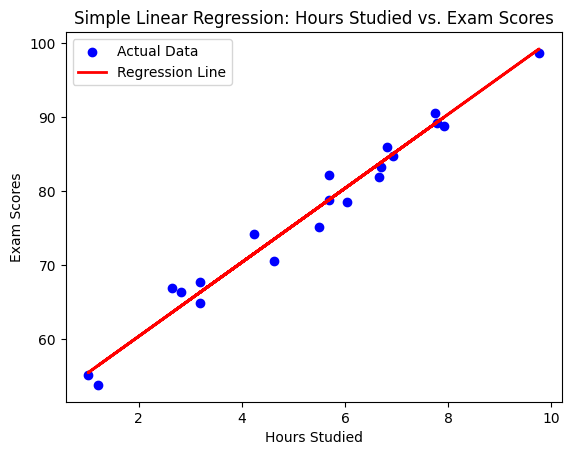

In [15]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line', linewidth=2)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.legend()
plt.title('Simple Linear Regression: Hours Studied vs. Exam Scores')
plt.show()

## date 29-06-2024

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
california_housing = fetch_california_housing()

In [8]:
data = pd.DataFrame(data=np.c_[california_housing['data'], california_housing['target']],
                    columns=california_housing['feature_names'] + ['target'])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
x= data.drop('target', axis=1)
y= data['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.5332001304956558

In [19]:
mse = mean_squared_error(y_test, y_pred)
mse

0.555891598695244

In [20]:
r2 = r2_score(y_test, y_pred)
r2

0.5757877060324511

In [23]:
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'R-squared (R²) Score: {r2:.3f}')

Mean Absolute Error (MAE): 0.533
Mean Squared Error (MSE): 0.556
R-squared (R²) Score: 0.576


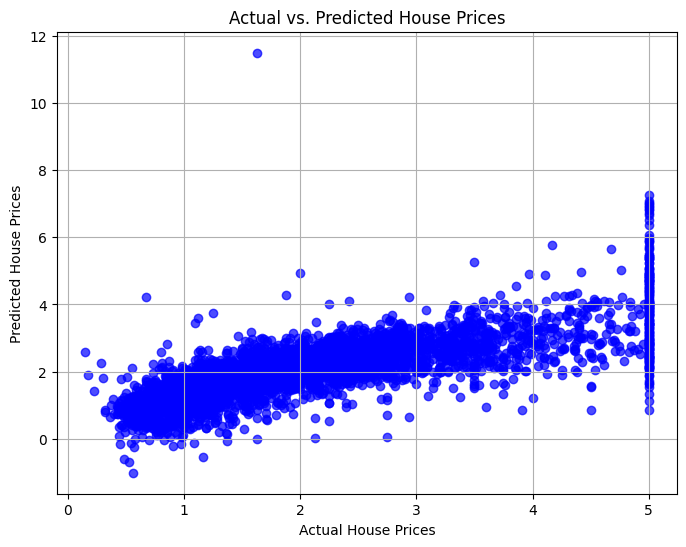

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

In [51]:
lst = ['Banana', 'Apple', 'Kiwi', 'Watermelon', ]
dict= {}
# {i[0]:i[1:] for i in lst}
for i in lst:
    dict[[i][0][0]]=i[1:]
print(dict)
    
   

{'B': 'anana', 'A': 'pple', 'K': 'iwi', 'W': 'atermelon'}

In [59]:
mydict= {}
mydict[2]=1
mydict

{2: 1}

In [69]:
sum=0
lst=[]
while sum<=100:
    num = int(input('enter your number: '))
    sum+=num
    lst.append(num)
    if sum>100:
        print(f'wrong, you have to enter {100-sum}')
print(lst)


wrong, you have to enter -30
[130]


In [75]:
i=5
for i in range(i):
    if i==4:
        break
    print(i, end=',')
    i=i+1
print(i)

0,1,2,3,4


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

In [12]:
df = pd.read_csv('breast_cancer_data.csv')

In [13]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [17]:
df.duplicated().sum()

0

In [18]:
X = df.drop('target', axis=1)
y = df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

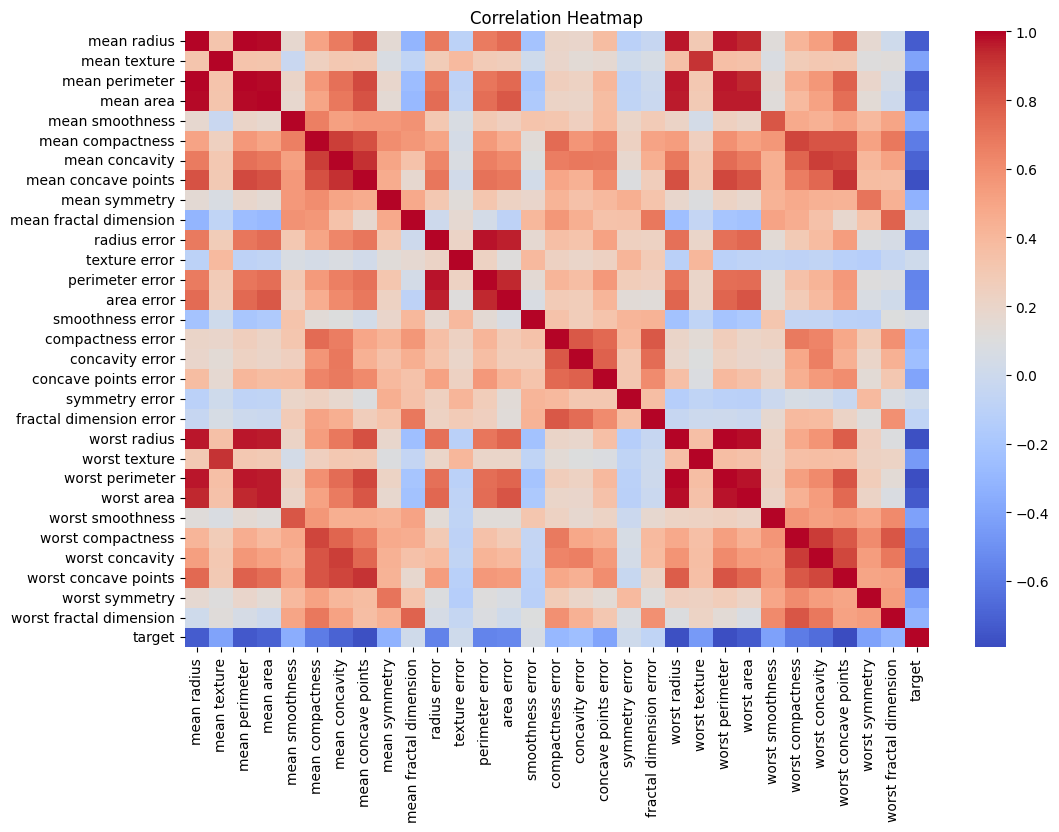

In [25]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [28]:
y_pred = model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0], dtype=int64)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158

In [32]:
confusion = confusion_matrix(y_test, y_pred)
print(f'confusion matrix:\n{confusion}')

confusion matrix:
[[41  2]
 [ 1 70]]


In [34]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [35]:
y_pred_prob = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)